# DSFB Assignment 1 - Solutions

In this assignment, you will work with data, examine distributions of some variables, and make some simple predictions. These basic operations are important in any data science project. 

[Pandas](https://pandas.pydata.org/) is a Python package built for data analysis. It includes many useful functions, including one to read comma-separated (.csv) files. We will use this package as it's both easy to use and very powerful.

First, we need to import Pandas. As you will be learning (or already know), popular Python packages have common abbreviates. These abbreviations are used as a short-hand for that package throughout a Python script. Some of these common abbreviations include:

- `import pandas as pd`
- `import numpy as np`
- `import tensorflow as tf`
- etc.

Second, we can call any function in the Pandas package as `pd.someFunction`. The `pd` keyword is reserved for Pandas and must not be used by any other variable. 

Third, `import` statements are generally located at the top of a script, even though they might only be used at a later stage.

Finally, do not hesitate to search the [Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/) for help.


In [1]:
import os

from math import log
 
import numpy as np    
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression


import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from scipy.stats import lognorm
from scipy.stats import gamma
from scipy.stats import beta
from scipy.special import expit

# PART 1: WORK WITH A TAB-SEPARATED TEXT FILE

In this section, you will load in a plain text file where columns have been separated by a tab character. The tab character is represented in code as the: `\t` symbol.   

Tab separated data is typical for government data or legacy data coming out of old mainframe systems.  

We will us data from the US Patent Office (USPTO). The file contains two columns:

- id: patent sub-class id
- title: patent sub-class title

**PROBLEM**: Open and read in the `USPTOsubclasses.txt` file using the native Python `open()` command.

In [2]:
# open the .txt file

textFile = open('data/USPTOsubclasses.txt')
rawdata = textFile.read()

**PROBLEM**: Make a list of lists. First, split the data by line, and the split it again by column. 

In [3]:
# split the raw text by the new line character "\n" )

lines = rawdata.split('\n')

In [4]:
# create a "list of lists" 
#   each entry in the "outer" list is a row from the file; 
#   each row can be split into an "inner" list of tab-separated columns

list_of_lists = []

for l in lines:
    list_of_lists.append(l.split('\t'))

In [5]:
# what's the sub-class "1/1" called?  hint: look at first 10 elements of your list...

list_of_lists[:10]

[['id', 'title'],
 ['-0T/74', 'NULL'],
 ['01L/294.8', 'NULL'],
 ['01L/298.8', 'NULL'],
 ['01L/299.0', 'NULL'],
 ['1/1', 'Unclassified'],
 ['100/1', 'BINDING'],
 ['100/10', 'With precutting of binder to length'],
 ['100/10.*1', 'WITH ADDITIONAL TREATMENT OF MATERIAL (100/70 R)'],
 ['100/100', 'WITH GROUND']]

**PROBLEM**: Turn the data into a Pandas dataframe and draw a random sample of 5 rows. 

In [6]:
# Hint: remember to split the header row from the data. It will be the first element in your list of lists

header = list_of_lists[0]
data = list_of_lists[1:]    # the data are the remaining elements AFTER the 0th row

# move data into a Pandas dataframe for easier manipulation
uspto = pd.DataFrame(data, columns=header)

In [7]:
# look at the dataframe

uspto.sample(n=5)

,id,title
160725,968/119,With means for fine adjustment of the regulato...
166283,D14/140.11,Includes screen
137273,56/50,Spindles
13018,139/1D,Pick measuring and counting
10919,132/252,Circumferential clamp


# PART 2: WORK WITH A CSV FILE IN PANDAS

In this section, we load data from the `data/epfl.csv` file into a pandas dataframe.  

The CSV file contains the courses offered at EPFL with the following two columns: 

  - course: full course name
  - code: course code, including field of study


**PROBLEM**: Load the data from `data/epfl.csv` into a Pandas dataframe.

In [8]:
# load the CSV 

EPFLcourses = pd.read_csv('data/epfl.csv')

In [9]:
# look at the number of rows and columns (i.e., the shape)

EPFLcourses.shape

(1758, 2)

**PROBLEM**: Look at the data.

In [10]:
# look at the first 5 rows

EPFLcourses.head(n=5)

,course,code
0,Accounting for finance,FIN-411
1,Advanced algorithms,CS-450
2,Advanced analog and rf integrated circuits des...,EE-520
3,Advanced analog and rf integrated circuits des...,EE-521
4,Advanced analysis i,MATH-400


In [11]:
# look at the last 5 rows

EPFLcourses.tail(n=5)

,course,code
1753,Water resources engineering,ENV-424
1754,Wave propagation along transmission lines,EE-575
1755,Wind energy,ETH-432
1756,Wireless receivers: algorithms and architectures,EE-442
1757,"Wood structures, properties and uses",MSE-466


In [12]:
# look at a random sample of 5 rows

EPFLcourses.sample(n=5)

,course,code
1552,Stèrèotomie,AR-211
1431,Semester project for specialisation e,EE-492(e)
1434,Semester project in bioengineering,BIOENG-489
113,Analyse numèrique,MATH-251(b)
1749,Visions et utopies,AR-407


## Create a new column: " `field` " 

The next set of problems are intended to extract the field code (e.g.: CS, EE, MATH) from the course code column and put it in a new column called `field`.

**PROBLEM**: Create a new column called `field` and fill it with zeros.

In [13]:
# create a dummy column called 'field' filled with a marker to indicate the value is currently missing
#   hint: the numpy package defines a special value called NaN to indicate Not a Number... 
#         so set the new column to `np.nan`

EPFLcourses['field'] = np.nan
EPFLcourses.head(n=5)

,course,code,field
0,Accounting for finance,FIN-411,NaN
1,Advanced algorithms,CS-450,NaN
2,Advanced analog and rf integrated circuits des...,EE-520,NaN
3,Advanced analog and rf integrated circuits des...,EE-521,NaN
4,Advanced analysis i,MATH-400,NaN


**PROBLEM**: Fill the new column with the field of the course. What symbol do you split on?

In [14]:
# fill the 'field' column with the split code

EPFLcourses['field'] = EPFLcourses['code'].str.split('-')
EPFLcourses.head(n=5)

,course,code,field
0,Accounting for finance,FIN-411,"[FIN, 411]"
1,Advanced algorithms,CS-450,"[CS, 450]"
2,Advanced analog and rf integrated circuits des...,EE-520,"[EE, 520]"
3,Advanced analog and rf integrated circuits des...,EE-521,"[EE, 521]"
4,Advanced analysis i,MATH-400,"[MATH, 400]"


In [15]:
# select the first list element (index 0) for each field entry

EPFLcourses['field'] = EPFLcourses['field'].str[0]
EPFLcourses.head(n=5)

,course,code,field
0,Accounting for finance,FIN-411,FIN
1,Advanced algorithms,CS-450,CS
2,Advanced analog and rf integrated circuits des...,EE-520,EE
3,Advanced analog and rf integrated circuits des...,EE-521,EE
4,Advanced analysis i,MATH-400,MATH


## Now clean the dataset, find missing fields, and remove those entries.

**PROBLEM**: Look at some examples where a value for `field` is missing. What's a course without a code/field?

In [16]:
# look at the entries without a field

EPFLcourses[EPFLcourses['field'].isna()].head(n=5)

,course,code,field
161,Autre contribution ‡ l'enseignement,NaN,NaN
162,Autre contribution ‡ l'enseignement,NaN,NaN
244,Chimie gènèrale avancèe (‡ choix),NaN,NaN
334,Cours ethz,NaN,NaN
335,Cours ethz,NaN,NaN


**PROBLEM**: How many rows are removed by dropping all rows without a value for `field`?

In [17]:
# inspect the shape of data before removing missing values

EPFLcourses.shape

(1758, 3)

In [18]:
# remove entries without a description

EPFLcourses = EPFLcourses.dropna(subset=['field'])

In [19]:
# after removing entries, inspect the shape of data again

EPFLcourses.shape

(1677, 3)

_Answer_: _________  81 rows have been dropped.

In [20]:
# make sure that entries were indeed removed

EPFLcourses[EPFLcourses['field'].isna()].head(n=5)

,course,code,field


## Now find out how many courses EPFL offers in each field. 

**PROBLEM**: Count the number of course entries by field  

In [21]:
# Count the number of course entries. Hint: Use Pandas `.groupby()` function to aggregate by field

EPFLcourses_count = EPFLcourses[['course', 'field']].groupby('field').agg('count')
EPFLcourses_count.head()

,course
field,
AR,130
BIO,76
BIOENG,29
CH,88
CIVIL,85


**PROBLEM**: How many Architecture (AR) courses are offered at EPFL?  

In [22]:
# You could just manually look at the results from above, or....
#   hint: the .loc['AR'] access method of a dataframe will find all results for 'AR' (of which there is one )
#         or the .at['AR','course'] access method will find the result for 'AR' for the aggregated value in 'course'

print(EPFLcourses_count.loc['AR'])
print()
print(EPFLcourses_count.at['AR','course'])

course    130
Name: AR, dtype: int64

130


**PROBLEM**: What field has the most courses?

In [23]:
# Hint: sort the grouped_bydata in descending order to find out what the most common fields are

EPFLcourses_count = EPFLcourses_count.sort_values(by='course', ascending = False)
EPFLcourses_count.head()

,course
field,
HUM,178
MATH,162
EE,139
AR,130
PHYS,125


### Finally, write the results back to disk

In this part, write the number of courses per field to disk as an Excel file and as a comma separated (.csv) file.

In [24]:
# First, we will re-organize the Pandas dataframe such that it has just two columns: field, course_count
#   The following code calls .reset_index() to reset the indexing of the dataframe
#   The code also redefines the names of the columns by setting .columns = ['field', 'course_count']

EPFLcourses_count = EPFLcourses_count.reset_index()
EPFLcourses_count.columns = ['field', 'course_count']
EPFLcourses_count.head()

,field,course_count
0,HUM,178
1,MATH,162
2,EE,139
3,AR,130
4,PHYS,125


**PROBLEM**: Write the data to BOTH an .xlsx and .csv file.

In [25]:
# write data to .xlsx (be sure to drop the index column)

EPFLcourses_count.to_excel('data/epfl_output.xlsx', index=False)

In [26]:
# write data to .csv (be sure to drop the index column)

EPFLcourses_count.to_csv('data/epfl_output.csv', index=False)

# PART 3: A SIMPLE REGRESSION PROBLEM

### First, let's define a simple DGP for this section...

We will define the DGP as a simple line, of the form `y = m * x + b` with the following coefficients: `m = 2` and `b = 3``

In [27]:
# this function implements our DGP

def dgp(x):
    return 2 * x + 3

**PROBLEM**: Does the DGP have any variance or noise?

_Answer:_ No - it is fully deterministic, with no noise and no sampling variance. 

**PROBLEM**: What are the values of `y` when `x` is equal to 1, 2, 3, 4 and 5?

In [28]:
# toy data

X = [1, 2, 3, 4, 5]
y = [dgp(i) for i in X]
print(y)

[5, 7, 9, 11, 13]


**PROBLEM**: Plot our data as red dots, and then _overlay_ a plot of the DGP as a black line 

Text(0.5,0,'X')

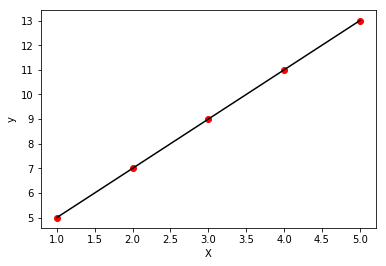

In [29]:
# plot data with axis labels

plt.scatter(X, y, color='red')
plt.plot(X, y, color='black')
plt.ylabel('y')
plt.xlabel('X')

### Use the sample mean to make a _very_ simple prediction...

The most basic "model" is just to predict the mean of Y. 

**PROBLEM**: Calculate and report the mean of the outcome variable `y`?

In [30]:
# compute the mean manually

y_mean = sum(y)/len(y)
y_mean

9.0

In [31]:
# now use a function from the numpy package to calculate the mean

y_mean = np.mean(y)
y_mean

9.0

**PROBLEM**: Plot our data as red dots, _overlay_ a plot of the DGP as a black line, and overlay a horizontal line at the mean of Y 

Text(0.5,0,'X')

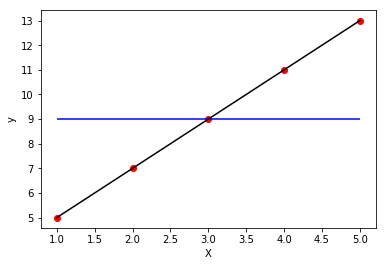

In [32]:
# plot mean prediction

plt.scatter(X, y, color='red')
plt.plot(X, y, color='black')
plt.hlines(y_mean, xmin = min(X), xmax = max(X), colors='blue')
plt.ylabel('y')
plt.xlabel('X')

**PROBLEM**: How well does the mean fit our DGP?

_Answer:_ This prediction does not fit well: it is systematically wrong (i.e., highly biased) to the observed data

### Fit a simple linear regression

You will now try to estimate the coefficients for the `m` and `b` parameters you see in the DGP.  

**PROBLEM**: Prepare to do a linear regression to `X` and `y`.

Let's convert all data into arrays (as defined by the numpy package) so that we know it is valid for numerical computation.

In [33]:
# First, you need to reshape the X data into a "Design Matrix" (a two-dimensional shape)
#  use the reshape() method of the array class of the numpy package
#  your desing matrix with have multiple rows of observations, 
#     but only 1 column as there is one predictor

X = np.array(X).reshape(-1, 1)
X

array([[1],
       [2],
       [3],
       [4],
       [5]])

In [34]:
# Second, also covert your y data into a numpy array 
#   hint: no need to change the shape - a simple 1-dimensional array (the default) is fine

y = np.array(y)

**PROBLEM**: Fit a linear regression for `y` and `X`

In [35]:
# fit a linear regression using the LinearRegression() model from sklearn

reg = LinearRegression().fit(X, y)

**PROBLEM**: Find and report the r-squared, coefficient m, and intercept for the model.

In [36]:
# evaluate the fit in terms of R^2 (i.e. variance explained)

reg.score(X, y)

1.0

In [37]:
# estimate coefficient m

reg.coef_

array([2.])

In [38]:
# estimate intercept b

reg.intercept_ 

2.9999999999999982

**PROBLEM**: Use the fitted regression model to calculate the predicted value of `y` at `x = 6`.

In [39]:
# use fitted model to predict y at x = 6

reg.predict([[6]])

array([15.])

**PROBLEM**: Show (by manual calculation) that the predicted value above matches the true DGP.

_Answer_:  

    Given the DGP y = m * x + b, its true coefficients m = 2 and b = 3 and x = 6

        y = m * x + b
        y = 2 * x + 3
        y = 2 * 6 + 3
        y = 15
        

# PART 4: A SIMPLE CLASSIFICATION PROBLEM

We will now consider some data that will be generated by a *nonlinear* and *noisy* DGP. We want to predict two classes, where `y` equals `1` or `0`, that depend only on the value of `x`. 

Think back to the Credit Default demo. In this example, `y` stands for defaulting and `x` might stand for your amount of debt. For this simple scenario, the more debt you have, the more likely you are to default. We would like predictions to lie in the continuous inerval `[0,1]`.

In [40]:
# generate random samples with seed = 0 and look at the first 10 values of X

np.random.seed(0)
n_samples = 100

X = np.random.normal(size = n_samples)
X[:10]  # inspect the first 10 observations

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ])

For all values `X > 0`, we will set `y` equal to `1` and `0` otherwise. Add some random noise to `X`. 

In [41]:
# set y to 1 if X > 0

y = X > 0               # Hint: this creates a y array of True and False
y = y.astype(np.float)  # Hint: this converts booleans to 1.0 if try, and 0.0 if False
y[:10]                  # look at the first 10 entries of y

array([1., 1., 1., 1., 1., 0., 1., 0., 0., 1.])

In [42]:
# add some Gaussian noise around the transition point of x = 0 

X = X + 0.2 * np.random.normal(size = n_samples)
X[:10]   # inspect first 10 entries of X

array([ 2.14068249,  0.1306054 ,  0.72464098,  2.43477254,  1.63293331,
       -0.58855364,  0.86736462, -0.30084817,  0.28136955,  0.70670146])

### Plot the data

Simply plot the data - plotting the data is key before fitting any statistical model. 

**PROBLEM**: Plot `X` and `y` on a scatterplot. Will a linear classifier fit these data well?

(-2.477704709602953, 2.43477254083306)

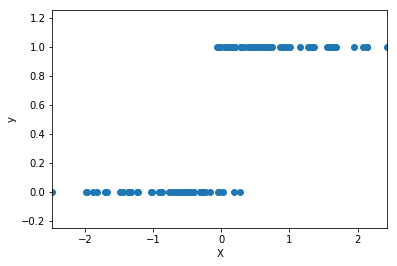

In [43]:
# scatterplot with axis labels

plt.scatter(X, y)
plt.ylabel('y')
plt.xlabel('X')
plt.ylim(-.25, 1.25)
plt.xlim(min(X), max(X))

### Fit a linear probability model

In this part, we simply plot the data. Plotting the data is key before fitting any statistical model. 

**PROBLEM**: Fit a linear regression and look at the intercept. Does the intercept have a reasonable values? Why not?

In [44]:
# fit the linear regression (hint: call .reshape(-1, 1) on X to tell NumPy that there's only one predictor )

X = X.reshape(-1, 1)

reg = LinearRegression().fit(X, y)

In [45]:
reg.intercept_

0.5216114089967183

**PROBLEM**: Plot the linear regression fit.

(array([-2.47770471]), array([2.43477254]))

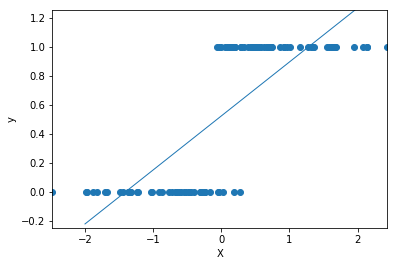

In [46]:
# plot linear regression fit

# np.linspace return evenly spaced numbers over a specified interval
X_test = np.linspace(-2, 2, 100).reshape(-1, 1)

# Option 1: manually extract the coefficients for the line y = m * x + b
y_pred_linear = reg.coef_ * X_test + reg.intercept_

# Option 2: use the .predict() function
# y_pred_linear = reg.predict(X_test)

plt.plot(X_test, y_pred_linear, linewidth=1)
plt.scatter(X, y)
plt.ylabel('y')
plt.xlabel('X')
plt.ylim(-.25, 1.25)
plt.xlim(min(X), max(X))

**PROBLEM**: What can you say about predictions for very small/large `x`?

_Answer: _____    Although the intercept looks plausible, the model predicts values outside the `[0,1]` range.

### Now fit a sigmoidal logit model, which may better fit the data.

Remember that for historical reasons, this is called "logistic regression" -- but it is for classification, not regression.

**PROBLEM**: Fit a logit model. 

In [47]:
# fit the logistic regression

logReg = LogisticRegression(solver='lbfgs').fit(X, y)

**PROBLEM**: Plot the fitted function. Hint: apply the expit() function to your prediction. This will convert the predictions to an inverse sigmoid shape. How does this model fit the data?

(array([-2.47770471]), array([2.43477254]))

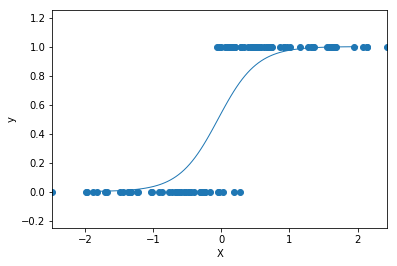

In [48]:
# plot linear regression fit

# Option 1: manually extract the coefficients (uncomment line below)
# y_pred_nonlinear = X_test * logReg.coef_ + logReg.intercept_
# transorm prediction to the inverse of the logit function (uncomment line below)
# y_pred_nonlinear = expit(y_pred_nonlinear)

# Option 2: use the .predict() function
y_pred_nonlinear = logReg.predict_proba(X_test)[:,1]

plt.plot(X_test, y_pred_nonlinear, linewidth=1)
plt.scatter(X, y)
plt.ylabel('y')
plt.xlabel('X')
plt.ylim(-.25, 1.25)
plt.xlim(min(X), max(X))


# Part 5: Examine Empirical Distributions 

In this section we have already drawn three samples from three different distributions. These appear in the `data/` directory as the files: `data1.txt`, `data2.txt`, `data3.txt`  

You do not know the true distributions from which these samples were drawn - but you can investigate them and try to guess...

### Generate Raw Data

Show only in the solution.  

In [49]:
def save_lst(lst, fname):
    fname = str(fname.strip())
    if os.path.exists(fname): os.remove(fname)
    with open(fname, 'w', encoding='utf-8') as f:
        for i in range(len(lst)):
            item = str(lst[i])
            if i < (len(lst) - 1): item += "\n"
            f.write(item)

In [50]:
save_lst(gamma.rvs(  a=5,       size=10000), 'data/data1.txt')
save_lst(beta.rvs(   a=2, b=10, size=10000), 'data/data2.txt')
save_lst(lognorm.rvs(s=0.2,     size=10000), 'data/data3.txt')

### Helper Functions

**PROBLEM**: Define a function to load a list of numbers from a text file.

In [51]:
def load_lst(fname, cast_as=float):
    fname = str(fname.strip())
    lst = list()
    with open(fname, mode='r', encoding='utf-8') as f:  
        text = f.read()
        for item in text.split():
            value = str(item).strip()
            lst.append(value)
    if cast_as: lst = [cast_as(x) for x in lst]
    return lst

**PROBLEM**: Define a function to plot a histogram for some data.  

In [52]:
def histogram(data, color='grey', xlabel=''):
    ax = sns.distplot(data, kde=False, bins=100, color=color, hist_kws={"linewidth": 15,'alpha':0.5})
    ax.set(xlabel=xlabel, ylabel='Frequency')

### Distribution 1

**PROBLEM**: Using your functions above, plot a histogram of `data1.txt`

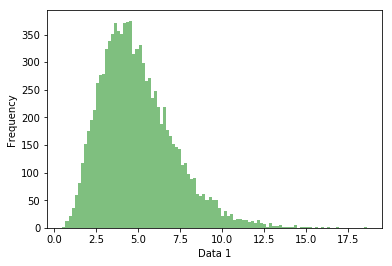

In [53]:
data1 = load_lst('data/data1.txt')
histogram(data1, xlabel='Data 1', color='green')

**PROBLEM**: Using your functions above, plot a histogram of the logged values of `data1.txt`

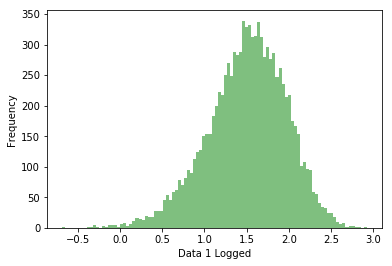

In [54]:
data1_log = [log(x) for x in data1]
histogram(data1_log, xlabel='Data 1 Logged', color='green')

### Distribution 2

**PROBLEM**: Using your functions above, plot a histogram of `data2.txt`

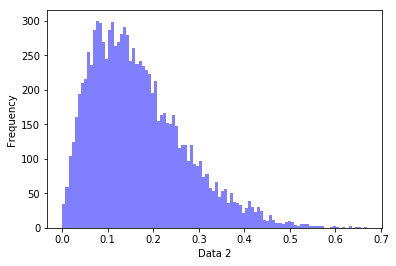

In [55]:
data2 = load_lst('data/data2.txt')
histogram(data2, xlabel='Data 2', color='blue')

**PROBLEM**: Using your functions above, plot a histogram of the logged values of `data2.txt`

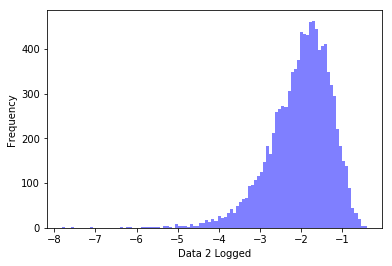

In [56]:
data2_log = [log(x) for x in data2]
histogram(data2_log, xlabel='Data 2 Logged', color='blue')

### Distribution 3

**PROBLEM**: Using your functions above, plot a histogram of `data3.txt`

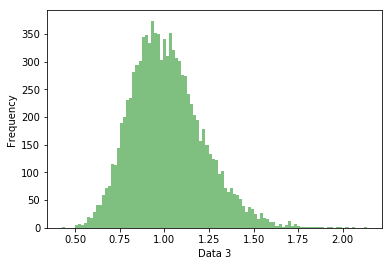

In [57]:
data3 = load_lst('data/data3.txt')
histogram(data3, xlabel='Data 3', color='green')

**PROBLEM**: Using your functions above, plot a histogram of the logged values of `data3.txt`

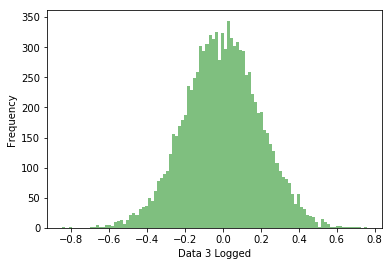

In [58]:
data3_log = [log(x) for x in data3]
histogram(data3_log, xlabel='Data 3 Logged', color='green')

### Make educated guesses about the distributions

Do some self-directed research to learn about different types of continuous distributions (guassian, gamma, exponential, etc.). Can you identify a distribution that you think could generated each of the three data files you observe above? If so, what kind of distributions? Explain each one for each file.

**PROBLEM**: What might be the distribution of `data1.txt`?

It is a gamma distribution. 

**PROBLEM**: What might be the distribution of `data2.txt`?

It is a beta distribution as it is continuous and falls on the interval of [0,1]. The Beta distribution is also a special case of the Dirichlet Distribution.

**PROBLEM**: What might be the distribution of `data3.txt`?

It is a lognormal distribution. A log transformation turns it back into a normal distribution.

### Estimate parameters for the distributions

**PROBLEM**: Based on your guess as to the true distribution of the distribution for the `data1.txt` sample, estimate parameters for that distribution.

In [59]:
a, loc, scale = gamma.fit(data1)
print('Alpha    =', a)
print('Location =', loc)
print('Scale    =', scale)

Alpha    = 4.806326226036164
Location = 0.13107019942532222
Scale    = 1.0080064278223309


**PROBLEM**: Based on your guess as to the true distribution of the distribution for the `data2.txt` sample, estimate parameters for that distribution.

In [60]:
a, b, loc, scale = beta.fit(data2)
print('Alpha    =', a)
print('Beta     =', b)
print('Location =', loc)
print('Scale    =', scale)

Alpha    = 2.0795534252326036
Beta     = 10.770049940977472
Location = -0.0010433382783147755
Scale    = 1.0410031987598831


/anaconda3/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:437: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


**PROBLEM**: Based on your guess as to the true distribution of the distribution for the `data3.txt` sample, estimate parameters for that distribution.

In [61]:
shape, loc, scale = lognorm.fit(data3)
print('Shape    =', shape)
print('Location =', loc)
print('Scale    =', scale)

Shape    = 0.19077296304554658
Location = -0.03900961681303078
Scale    = 1.036239032984593


### Comment on your estimated parameters for the above distributions

**PROBLEM**: Will the estimated parameters reported in Question 6 above be the **_True_** population parameters? Why or why not?

No - the data comes from a sample drawn from the true population. The sample therefore exhibits _**sampling variation**_ from the true population. The parameters are estimated from the sample, so they are likely to vary from the true population parameters. 

# Part 6: Plot some Theoretical Distributions 

In the previous section, you examined empirical distributions for three files. Now you will plot the theoretical probability density function (pdf) from one particular distribution: the Beta distribution.   

The Beta distribution has two parameters: $\alpha$ and $\beta$).


**PROBLEM**: Plot the **pdf** for a beta distribution with parameters $\alpha = 2$ and $\beta = 5$.

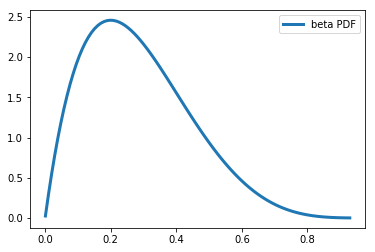

In [62]:
# define alpha and beta
a, b = 2, 5

# pull from beta PDF and plot distribution
x = np.linspace(beta.ppf(0.00001, a, b), beta.ppf(0.99999, a, b), 100)
pdf = beta.pdf(x, a, b)

plt.plot(x, pdf, lw=3, label='beta PDF')
plt.legend()
plt.show()

**PROBLEM**: Now plot the same pdf with vertical lines and labels for the lines at the mean, median, and mode of the same distribution as above.

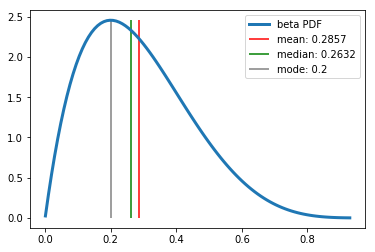

In [63]:
plt.plot(x, pdf, lw=3, label='beta PDF')

# plot mean
mea = a / (a + b)
plt.vlines(mea, ymin = 0, ymax = max(pdf), color = 'red', label='mean: {}'.format(round(mea, 4)))

# plot median
med = (a - 1/3) / (a + b - 2/3)
plt.vlines(med , ymin = 0, ymax = max(pdf), color = 'green', label='median: {}'.format(round(med, 4)))

# plot mode
mod = (a - 1) / (a + b -2)
plt.vlines(mod , ymin = 0, ymax = max(pdf), color = 'gray', label='mode: {}'.format(round(mod, 4)))
plt.legend()
plt.show()

**PROBLEM**: Comment on why (intuitively) the mean, median and mode are ordered as shown above. 

A right-tailed distribution pulls the mean towards the side with the long tail. The median is less sensitive to values in the tail, so it's located to the left of the mean. The mode indicates the most frequently occuring value in that distribution. 

**PROBLEM**: Comment on the nature of the probability distribution function for the outcome. What's the distribution skew and kurtosis? How can we interpret skewness? Why does skewness matter? What migh be a remedy to "de-skew" data?

In [64]:
# compute skewness and kurtosis 
skew, kurt = beta.stats(a, b, moments = 'sk')
print('Skew: {}'.format(skew))
print('Kurtosis: {}'.format(kurt))

Skew: 0.5962847939999439
Kurtosis: -0.12


Positive skew tells us that the distribution has a long right tail, i.e. it's right-skewed.

Data skewness is important in data science, e.g. in the case of predicting continuous outcomes. Incorrect predictions in the left part of the distirbution have a different impact on the loss than incorrect predictions in the right part. A common remedy for skewed distributions is to log-transform the feature.